# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [6]:
df_raw.shape

(400, 4)

Answer: There are 400 observations

#### Question 2. Create a summary table

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GPA has a much smaller range of potential values than GRE, therefore the standard deviation for GRE is likely to be higher.

#### Question 4. Drop data points with missing data


In [13]:
df_clean = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [14]:
df_clean.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [16]:
df_clean.shape

(397, 4)

Answer: The cleaned data has no null values and less observations than the original data

#### Question 6. Create box plots for GRE and GPA

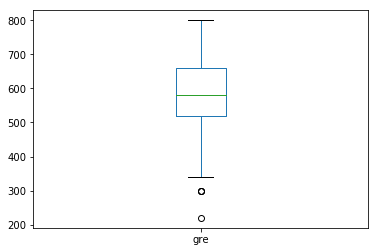

In [18]:
df_clean["gre"].plot(kind = "box")

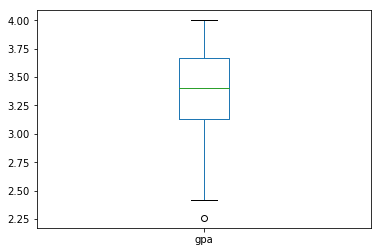

In [19]:
df_clean["gpa"].plot(kind = "box")

#### Question 7. What do this plots show?

Answer: The plots show that both gre and gpa are skewed towards the low end. They also both have outliers on the low end (e.g. a student that is admitted with a very low GPA / GRE score).

#### Question 8. Describe each distribution 

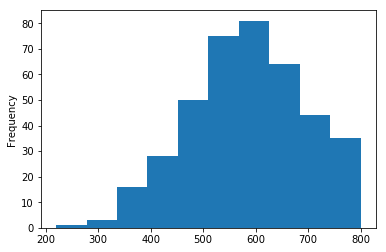

In [20]:
# plot the distribution of each variable 

df_clean["gre"].plot(kind = "hist")

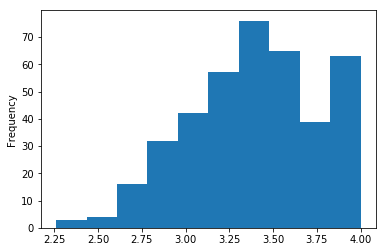

In [21]:
df_clean["gpa"].plot(kind = "hist")

- Both charts are skewed to the left, asymmetric, and non-uniform distribution
- The GRE chart has 1 peak while the GPA chart has 2 peaks

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, it would not because the data is skewed

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: If you wanted to make the distribution of the data more normal, you would need a correction because the data is skewed. To make the distribution more normal, you can consider removing the outliers at the bottom of the range

#### Question 11. Which of our variables are potentially colinear? 

- GRE and GPA are potentially colinear because they measure similar attributes (academic success)

In [22]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA do have a significant amount of correlation so the two variables are likely to have some colinearity. 

Of the three variables, pretige would be the best predictor for admissions (though still not a very strong predictor)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
- Look at the correlation between school admissions and prestige of undergrad schools
- Plot the data as a scatter plot
- Perform linear regression and observe the R^2 value to see the strength of the relationship
- Perform KNN and adjust number of 'neighbor' inputs to see how that could affect the score of the model

#### Question 14. What is your hypothesis? 

Answer: hypothesis is there is a moderate negative relationship between the prestige of the undergrad school and admissions (i.e. the higher the prestige of the school, the lower the likelihood of admission)

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data